<a href="https://colab.research.google.com/github/AL-Jalili/Anchusa_project/blob/main/RNN_entropy_anchusa_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('/content/Sliding_mmse.csv')

In [5]:
df.head(20)

,sample,subject,condition,mmse
0,0,0,two_back,1.520214
1,1,0,two_back,1.589377
2,2,0,two_back,1.584795
3,3,0,two_back,1.570482
4,4,0,two_back,1.621261
5,5,0,two_back,1.403195
6,6,0,two_back,1.468132
7,7,0,two_back,1.527414
8,8,0,two_back,1.588708
9,9,0,two_back,1.602386


In [6]:
X = np.array(df["mmse"])

In [7]:
X.shape

(7458,)

In [8]:
features_array = X.reshape((-1,11))

In [9]:
features_array.shape

(678, 11)

In [10]:
y = np.array(df['condition'])

In [11]:
label_array = y.reshape((-1,11))[:,0]

In [12]:
label_array

array(['two_back', 'no_back', 'two_back', 'no_back', 'two_back',
       'no_back', 'two_back', 'no_back', 'two_back', 'no_back',
       'two_back', 'no_back', 'two_back', 'no_back', 'two_back',
       'no_back', 'two_back', 'no_back', 'two_back', 'no_back',
       'two_back', 'no_back', 'two_back', 'no_back', 'two_back',
       'no_back', 'two_back', 'no_back', 'two_back', 'no_back',
       'two_back', 'no_back', 'two_back', 'no_back', 'two_back',
       'no_back', 'two_back', 'no_back', 'two_back', 'no_back',
       'two_back', 'no_back', 'two_back', 'no_back', 'two_back',
       'no_back', 'two_back', 'no_back', 'two_back', 'no_back',
       'two_back', 'no_back', 'two_back', 'no_back', 'two_back',
       'no_back', 'two_back', 'no_back', 'two_back', 'no_back',
       'two_back', 'no_back', 'two_back', 'no_back', 'two_back',
       'no_back', 'two_back', 'no_back', 'two_back', 'no_back',
       'two_back', 'no_back', 'two_back', 'no_back', 'two_back',
       'no_back', 'two_back', 'n

In [13]:
label_array = np.where(label_array == 'no_back',1,0)

In [14]:
label_array

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,

In [15]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
split_ratio = 0.9
n_train = int(split_ratio * features_array.shape[0])

X_train = features_array[:n_train,:]
y_train = label_array[:n_train]
X_test = features_array[n_train:,:]
y_test = label_array[n_train:]

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [16]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=42)
print(y_train)

[1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1
 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0
 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1
 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1
 1 1 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0
 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0
 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1
 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1
 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1
 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1
 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0
 1 1 1 1 0 0 0 0 1 0 1 0 

In [17]:
from tensorflow.keras import Model
from tensorflow.keras.layers import GRU, Dense, Input, LSTM
import tensorflow as tf
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.losses import binary_crossentropy

In [18]:
sequence_length = 11
n_signal = 1

In [19]:
inp = Input(shape = (sequence_length, n_signal))
first_layer = GRU(10, activation='sigmoid', return_sequences=True)(inp)
second_layer = GRU(10, activation='sigmoid', return_sequences=True)(first_layer)
third_layer = GRU(10, activation='sigmoid', return_sequences=False)(second_layer)
output = Dense(1, activation = 'sigmoid')(third_layer)

model_GRU = Model(inputs = inp, outputs = output)

model_GRU.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 11, 1)]           0         
                                                                 
 gru (GRU)                   (None, 11, 10)            390       
                                                                 
 gru_1 (GRU)                 (None, 11, 10)            660       
                                                                 
 gru_2 (GRU)                 (None, 10)                660       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 1721 (6.72 KB)
Trainable params: 1721 (6.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
import keras
keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=5)

In [21]:
opt = Adam(lr = 0.001)
# opt = SGD(lr = 0.01)
loss = binary_crossentropy
model_GRU.compile(optimizer = opt, loss = loss, metrics = 'acc')

In [33]:
results = model_GRU.fit(X_train.reshape((-1,sequence_length,1)), y_train, batch_size =128, epochs = 500, validation_split= 0.2,callbacks=[callback])

Epoch 1/500
4/4 [==============================] - 0s 47ms/step - loss: 0.6931 - acc: 0.5061 - val_loss: 0.6942 - val_acc: 0.4754
Epoch 2/500
4/4 [==============================] - 0s 31ms/step - loss: 0.6931 - acc: 0.5061 - val_loss: 0.6941 - val_acc: 0.4754
Epoch 3/500
4/4 [==============================] - 0s 31ms/step - loss: 0.6931 - acc: 0.5061 - val_loss: 0.6940 - val_acc: 0.4754
Epoch 4/500
4/4 [==============================] - 0s 28ms/step - loss: 0.6931 - acc: 0.5061 - val_loss: 0.6940 - val_acc: 0.4754
Epoch 5/500
4/4 [==============================] - 0s 26ms/step - loss: 0.6931 - acc: 0.5061 - val_loss: 0.6938 - val_acc: 0.4754
Epoch 6/500
4/4 [==============================] - 0s 30ms/step - loss: 0.6930 - acc: 0.5061 - val_loss: 0.6937 - val_acc: 0.4754
Epoch 7/500
4/4 [==============================] - 0s 25ms/step - loss: 0.6931 - acc: 0.5061 - val_loss: 0.6936 - val_acc: 0.4754
Epoch 8/500
4/4 [==============================] - 0s 30ms/step - loss: 0.6930 - acc: 0.50

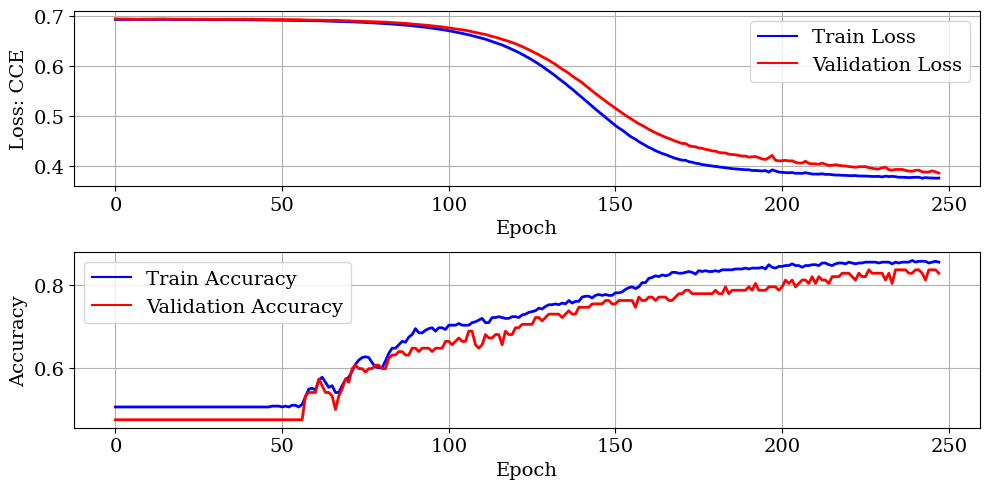

In [34]:
import matplotlib.pyplot as plt
import matplotlib

# Set the font family to serif
matplotlib.rcParams['font.family'] = 'serif'

# Set the desired fontsize
fontsize = 14

train_loss = results.history['loss']
val_loss = results.history['val_loss']


# Create a figure with two subplots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

# Plot the train and validation loss in the top subplot
axs[0].plot(train_loss, label='Train Loss', color ='b')
axs[0].plot(val_loss, label='Validation Loss', color='r')

# Set the axis labels and title for the top subplot
axs[0].set_xlabel('Epoch', fontsize=fontsize)
axs[0].set_ylabel('Loss: CCE', fontsize=fontsize)
#axs[0].set_title('Training and Validation Loss', fontsize=fontsize)

# Set the legend and grid for the top subplot
axs[0].legend(fontsize=fontsize)
axs[0].grid(True)

# Set the tick labels fontsize for the top subplot
axs[0].tick_params(axis='both', which='major', labelsize=fontsize)

# Set the line colors and linewidths for the top subplot
axs[0].lines[0].set_linewidth(2)
axs[0].lines[1].set_linewidth(2)



train_acc =results.history['acc']
val_acc = results.history['val_acc']


# Plot the train and validation accuracy in the bottom subplot
axs[1].plot(train_acc, label='Train Accuracy', color ='b')
axs[1].plot(val_acc, label='Validation Accuracy', color='r')

# Set the axis labels and title for the bottom subplot
axs[1].set_xlabel('Epoch', fontsize=fontsize)
axs[1].set_ylabel('Accuracy', fontsize=fontsize)

# Set the legend and grid for the bottom subplot
axs[1].legend(fontsize=fontsize)
axs[1].grid(True)

# Set the tick labels fontsize for the bottom subplot
axs[1].tick_params(axis='both', which='major', labelsize=fontsize)

# Set the line colors and linewidths for the bottom subplot
axs[1].lines[0].set_linewidth(2)
axs[1].lines[1].set_linewidth(2)

# Adjust the spacing between the subplots
fig.tight_layout()

# Show the plot
plt.show()


3/3 [==============================] - 0s 6ms/step
Confusion_matrix:  tf.Tensor(
[[30  4]
 [ 8 26]], shape=(2, 2), dtype=int32)


<Axes: >

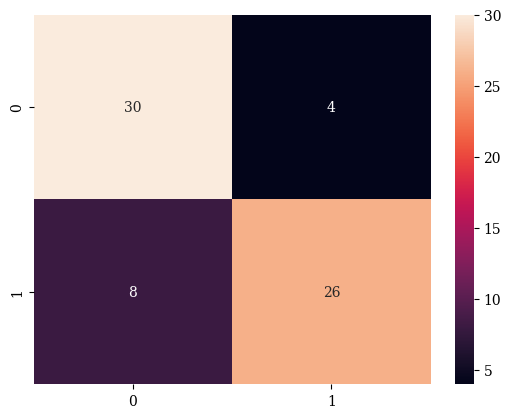

In [35]:
# Evaluating confusion matrix
y_hat = model_GRU.predict(X_test)
y_hat = np.where(y_hat>0.5,1,0)
y_true = np.where(y_test>0.5,1,0)
cf_matrix = tf.math.confusion_matrix(y_true,y_hat)

# Printing the result
print('Confusion_matrix: ',cf_matrix)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [36]:
from sklearn.metrics import classification_report
from tensorflow import keras
import numpy as np



y_hat = model_GRU.predict(X_test)
y_hat = np.where(y_hat>0.5,1,0)
y_true = np.where(y_test>0.5,1,0)
report = classification_report(y_true, y_hat)
#print("End epoch {} of training; got log keys: {}".format(epoch, keys))
print('\n', report)

3/3 [==============================] - 0s 9ms/step

               precision    recall  f1-score   support

           0       0.79      0.88      0.83        34
           1       0.87      0.76      0.81        34

    accuracy                           0.82        68
   macro avg       0.83      0.82      0.82        68
weighted avg       0.83      0.82      0.82        68



In [37]:
inp = Input(shape = (sequence_length, n_signal))
first_layer = LSTM(10, activation='sigmoid', return_sequences=True)(inp)
second_layer = LSTM(10, activation='sigmoid', return_sequences=True)(first_layer)
third_layer = LSTM(10, activation='sigmoid', return_sequences=False)(second_layer)
output = Dense(1, activation = 'sigmoid')(third_layer)

model_lstm = Model(inputs = inp, outputs = output)

model_lstm.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 11, 1)]           0         
                                                                 
 lstm_3 (LSTM)               (None, 11, 10)            480       
                                                                 
 lstm_4 (LSTM)               (None, 11, 10)            840       
                                                                 
 lstm_5 (LSTM)               (None, 10)                840       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2171 (8.48 KB)
Trainable params: 2171 (8.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
opt = Adam(lr = 0.001)
# opt = SGD(lr = 0.01)
loss = binary_crossentropy
model_lstm.compile(optimizer = opt, loss = loss, metrics = 'acc')

In [40]:
results = model_lstm.fit(X_train.reshape((-1,sequence_length,1)), y_train, batch_size =128, epochs = 600, validation_split= 0.2,callbacks=[callback])

Epoch 1/600
4/4 [==============================] - 0s 62ms/step - loss: 0.6931 - acc: 0.5061 - val_loss: 0.6943 - val_acc: 0.4754
Epoch 2/600
4/4 [==============================] - 0s 41ms/step - loss: 0.6931 - acc: 0.5061 - val_loss: 0.6942 - val_acc: 0.4754
Epoch 3/600
4/4 [==============================] - 0s 42ms/step - loss: 0.6931 - acc: 0.5061 - val_loss: 0.6940 - val_acc: 0.4754
Epoch 4/600
4/4 [==============================] - 0s 42ms/step - loss: 0.6930 - acc: 0.5061 - val_loss: 0.6939 - val_acc: 0.4754
Epoch 5/600
4/4 [==============================] - 0s 43ms/step - loss: 0.6930 - acc: 0.5061 - val_loss: 0.6937 - val_acc: 0.4754
Epoch 6/600
4/4 [==============================] - 0s 53ms/step - loss: 0.6930 - acc: 0.5061 - val_loss: 0.6936 - val_acc: 0.4754
Epoch 7/600
4/4 [==============================] - 0s 44ms/step - loss: 0.6930 - acc: 0.5061 - val_loss: 0.6937 - val_acc: 0.4754
Epoch 8/600
4/4 [==============================] - 0s 43ms/step - loss: 0.6930 - acc: 0.50

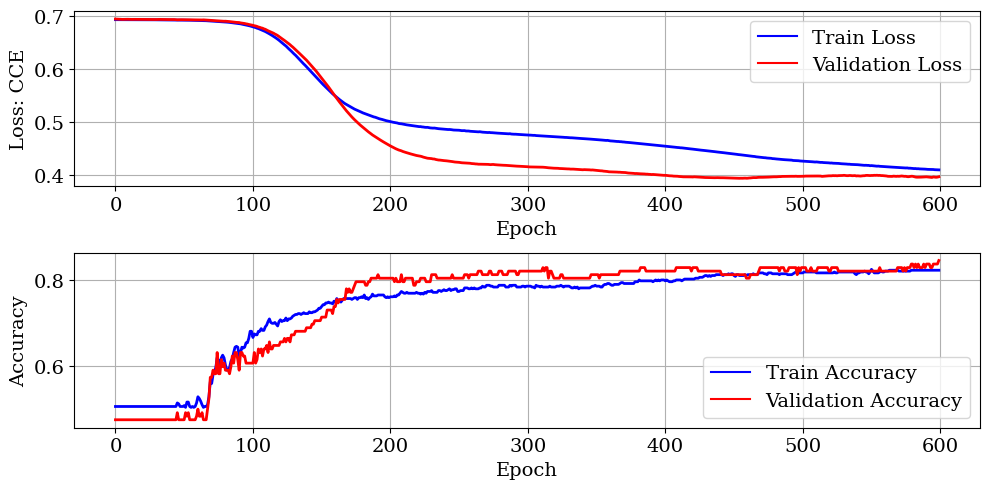

In [41]:
import matplotlib.pyplot as plt
import matplotlib

# Set the font family to serif
matplotlib.rcParams['font.family'] = 'serif'

# Set the desired fontsize
fontsize = 14

train_loss = results.history['loss']
val_loss = results.history['val_loss']


# Create a figure with two subplots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

# Plot the train and validation loss in the top subplot
axs[0].plot(train_loss, label='Train Loss', color ='b')
axs[0].plot(val_loss, label='Validation Loss', color='r')

# Set the axis labels and title for the top subplot
axs[0].set_xlabel('Epoch', fontsize=fontsize)
axs[0].set_ylabel('Loss: CCE', fontsize=fontsize)
#axs[0].set_title('Training and Validation Loss', fontsize=fontsize)

# Set the legend and grid for the top subplot
axs[0].legend(fontsize=fontsize)
axs[0].grid(True)

# Set the tick labels fontsize for the top subplot
axs[0].tick_params(axis='both', which='major', labelsize=fontsize)

# Set the line colors and linewidths for the top subplot
axs[0].lines[0].set_linewidth(2)
axs[0].lines[1].set_linewidth(2)



train_acc =results.history['acc']
val_acc = results.history['val_acc']


# Plot the train and validation accuracy in the bottom subplot
axs[1].plot(train_acc, label='Train Accuracy', color ='b')
axs[1].plot(val_acc, label='Validation Accuracy', color='r')

# Set the axis labels and title for the bottom subplot
axs[1].set_xlabel('Epoch', fontsize=fontsize)
axs[1].set_ylabel('Accuracy', fontsize=fontsize)

# Set the legend and grid for the bottom subplot
axs[1].legend(fontsize=fontsize)
axs[1].grid(True)

# Set the tick labels fontsize for the bottom subplot
axs[1].tick_params(axis='both', which='major', labelsize=fontsize)

# Set the line colors and linewidths for the bottom subplot
axs[1].lines[0].set_linewidth(2)
axs[1].lines[1].set_linewidth(2)

# Adjust the spacing between the subplots
fig.tight_layout()

# Show the plot
plt.show()


3/3 [==============================] - 0s 5ms/step
Confusion_matrix:  tf.Tensor(
[[27  7]
 [ 8 26]], shape=(2, 2), dtype=int32)


<Axes: >

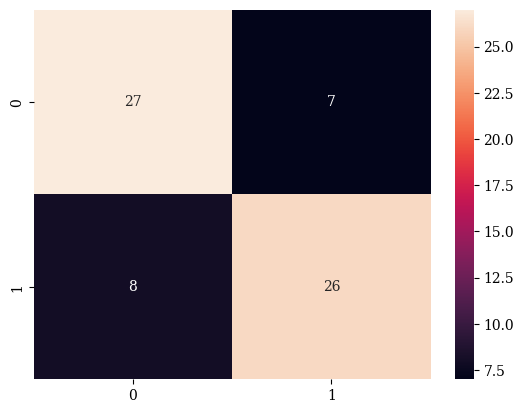

In [42]:
# Evaluating confusion matrix
y_hat = model_lstm.predict(X_test)
y_hat = np.where(y_hat>0.5,1,0)
y_true = np.where(y_test>0.5,1,0)
cf_matrix = tf.math.confusion_matrix(y_true,y_hat)

# Printing the result
print('Confusion_matrix: ',cf_matrix)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [43]:
from sklearn.metrics import classification_report
from tensorflow import keras
import numpy as np



y_hat = model_lstm.predict(X_test)
y_hat = np.where(y_hat>0.5,1,0)
y_true = np.where(y_test>0.5,1,0)
report = classification_report(y_true, y_hat)
#print("End epoch {} of training; got log keys: {}".format(epoch, keys))
print('\n', report)

3/3 [==============================] - 0s 7ms/step

               precision    recall  f1-score   support

           0       0.77      0.79      0.78        34
           1       0.79      0.76      0.78        34

    accuracy                           0.78        68
   macro avg       0.78      0.78      0.78        68
weighted avg       0.78      0.78      0.78        68

